In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### <span style='color:lightgreen;'>การปรับแต่งภาพแบบง่าย</span>

**<span style='color:lightgreen;'>การกลับภาพแนวนอนและแนวตั้ง</span>** การกลับภาพแนวนอนคือการสะท้อนภาพตามแกนตั้ง ส่วนการกลับภาพแนวตั้งคือการสะท้อนภาพตามแกนนอน
1. **<span style='color:lightgreen;'>สมการเชิงคณิตศาสตร์ของการกลับภาพแนวนอน:</span>** สมมติว่ามีภาพแทนด้วยเมทริกซ์ I โดย I(x, y) คือค่าพิกเซลที่ตำแหน่ง (x, y) ถ้า (x,y) เป็นตำแหน่งพิกเซล ตำแหน่งใหม่หลังกลับแนวนอนคือ (x, W−1−y)
2. **<span style='color:lightgreen;'>สมการเชิงคณิตศาสตร์ของการกลับภาพแนวตั้ง:</span>** การกลับภาพแนวตั้งคือการสะท้อนภาพตามแกนนอน สมการคือ: ถ้า (x,y) เป็นตำแหน่งพิกเซล ตำแหน่งใหม่หลังกลับแนวตั้งคือ (H−1−x, y)

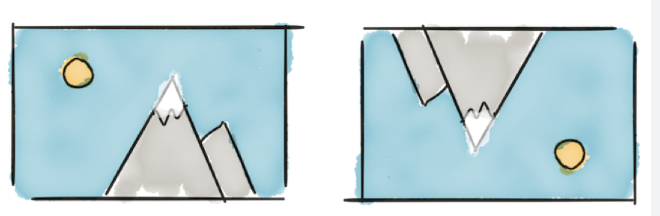


In [2]:
def ShowImage(img):
    plt.axis("off")
    plt.imshow(img, cmap='gray')
    plt.show()

In [3]:
def flip_image(img, opt):
    r,c = img.shape
    out = np.zeros_like(img, dtype='uint8') 
    for i in range(r):
        for j in range(c):
            if opt == 0:
                #out[i,c-j-1] = img[i,j]
                out[i,j] = img[i,c-j-1]
            elif opt == 1:
                #out[r-i-1,j] = img[i,j]
                out[i,j] = img[r-i-1,j]
            elif opt == 2:
                #out[r-i-1,c-j-1] = img[i,j]
                out[i,j] = img[r-i-1,c-j-1]
            else:
                out[i,j] = img[i,j]
    return out.astype(np.uint8)


In [ ]:
def hFlip(img) :
    out = np.zeros_like(img,dtype='uint8')
    h , w = img.shape
    for i in range(h) :
        for j in range(w) :
            out[i,j] = img[i,w-j-1]
    return out

In [ ]:
def vFlip(img) :
    out = np.zeros_like(img,dtype='uint8')
    h , w = img.shape
    for i in range(h) :
        for j in range(w) :
            out[i,j] = img[h-i-1,j]
    return out

- `flip_image(img, opt)` = ฟังก์ชันรวม เลือกทิศทางด้วย `opt`
    - `opt = 0` → กลับซ้าย‑ขวา (แนวนอน)
    - `opt = 1` → กลับบน‑ล่าง (แนวตั้ง)
    - `opt = 2` → กลับทั้งซ้าย‑ขวาและบน‑ล่าง (หมุน 180°)
- `hFlip(img)` = กลับซ้าย‑ขวาอย่างเดียว (แนวนอน)
- `vFlip(img)` = กลับบน‑ล่างอย่างเดียว (แนวตั้ง)

In [4]:
img = cv2.imread("./img/cameraman.png", 0)


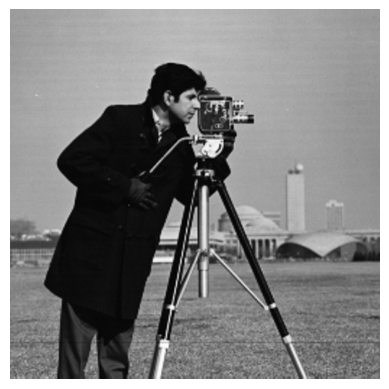

(512, 512)


In [5]:
ShowImage(img)
print(img.shape)

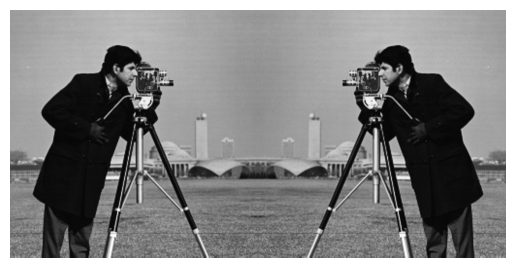

In [10]:
hout = hFlip(img)
hconcat = cv2.hconcat([img,hout])
plt.imshow(hconcat,cmap='gray')
plt.axis('off')
plt.show()

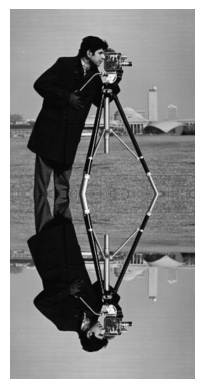

In [11]:
vout = vFlip(img)
vconcat = cv2.vconcat([img,vout])
plt.imshow(vconcat,cmap='gray')
plt.axis('off')
plt.show()

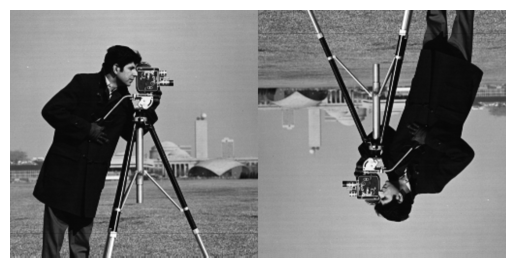

In [14]:
flip_img = flip_image(img, 2) # 0=H, 1=V, 2=180
mul_img = cv2.hconcat([img, flip_img])
ShowImage(mul_img)

**<span style='color:lightgreen;'>ภาพทรานสโพส (Transposed Image)</span>** การทรานสโพสภาพคือการสลับแถวกับคอลัมน์ เหมือนการหมุนภาพ 90 องศาทวนเข็มนาฬิกา แล้วกลับภาพแนวนอน
1. **<span style='color:lightgreen;'>สมการเชิงคณิตศาสตร์ของการกลับตามแนวทแยง:</span>** ภาพทรานสโพสจะสลับแถวและคอลัมน์ ทำให้ภาพสะท้อนตามแนวทแยง สมการคือ: ถ้า (x,y) เป็นตำแหน่งพิกเซล ตำแหน่งใหม่หลังทรานสโพสคือ (y,x)

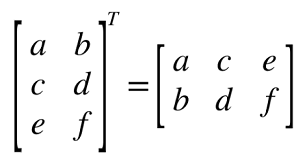


In [7]:
def Transpost_image(img):
    r, c = img.shape
    out = np.zeros((c, r), dtype='uint8') 
    
    for i in range(c):
        for j in range(r):
            out[i, j] = img[j,i]

    return out.astype(np.uint8)


In [8]:
def Transpost_image_edited(img):
    r, c = img.shape
    out = np.zeros((c, r), dtype='uint8') 
    
    for i in range(c):
        out[i, :] = img[:,i]

    return out.astype(np.uint8)

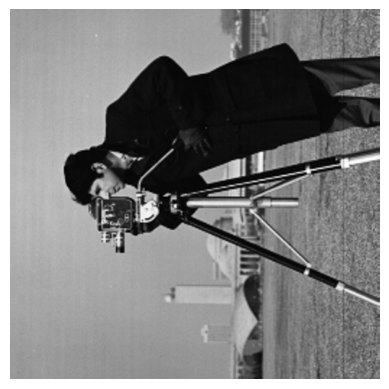

In [9]:
Timg = Transpost_image_edited(img)
ShowImage(Timg)